In [50]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

In [89]:
df = pd.read_excel('Online retail.xlsx')
df

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [90]:
df = df.dropna()

In [91]:
transactions = df.iloc[:,0].apply(lambda x: x.split(',')).tolist()
transactions

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spaghetti',
  'mineral water',
  'black tea',
  'salmon',
  'eggs',
  'chicken',
  'extra dark chocolate'],
 ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'],
 ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'],
 ['rice', 'sparkling water'],
 ['spaghetti', 'mineral water', 'ham', 'body spray',

In [92]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()


In [93]:
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [94]:
df_encoded

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
from mlxtend.frequent_patterns import apriori

In [103]:
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Freuqnt Itemsets :")
print(frequent_itemsets)

Freuqnt Itemsets :
      support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (mineral water, ground beef, milk)
255  0.017067  (mineral water, ground beef, spaghetti)
256  0.015733         (mineral water, milk, spaghetti)
257  0.010267    (mineral water, olive oil, spaghetti)
258  0.011467     (mineral water, pancakes, spaghetti)

[259 rows x 2 columns]


In [97]:
from mlxtend.frequent_patterns import association_rules

In [112]:
min_confidence = 0.3
num_itemsets = len(frequent_itemsets)
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric='confidence', min_threshold=min_confidence)
rules


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
1,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
2,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,1.0,0.008151,1.152074,0.322947,0.094107,0.132000,0.227046
3,(cereals),(mineral water),0.025733,0.238267,0.010267,0.398964,1.674442,1.0,0.004135,1.267367,0.413425,0.040462,0.210962,0.221026
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"(milk, spaghetti)",(mineral water),0.035467,0.238267,0.015733,0.443609,1.861817,1.0,0.007283,1.369061,0.479911,0.060982,0.269572,0.254821
59,"(mineral water, olive oil)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,1.0,0.005484,1.318826,0.549222,0.053659,0.241750,0.216373
60,"(olive oil, spaghetti)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,1.0,0.004802,1.379138,0.478747,0.040914,0.274910,0.245382
61,"(mineral water, pancakes)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,1.0,0.005593,1.251163,0.504751,0.058384,0.200744,0.202885


In [113]:
filtered_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.3)]
print("Filtered Rules:")
filtered_rules

Filtered Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
1,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,1.0,0.013127,1.224782,0.499351,0.120941,0.183528,0.245256
2,(cake),(mineral water),0.081067,0.238267,0.027467,0.338816,1.422002,1.0,0.008151,1.152074,0.322947,0.094107,0.132000,0.227046
3,(cereals),(mineral water),0.025733,0.238267,0.010267,0.398964,1.674442,1.0,0.004135,1.267367,0.413425,0.040462,0.210962,0.221026
4,(chicken),(mineral water),0.060000,0.238267,0.022800,0.380000,1.594852,1.0,0.008504,1.228602,0.396790,0.082769,0.186067,0.237846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,"(milk, spaghetti)",(mineral water),0.035467,0.238267,0.015733,0.443609,1.861817,1.0,0.007283,1.369061,0.479911,0.060982,0.269572,0.254821
59,"(mineral water, olive oil)",(spaghetti),0.027467,0.174133,0.010267,0.373786,2.146553,1.0,0.005484,1.318826,0.549222,0.053659,0.241750,0.216373
60,"(olive oil, spaghetti)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,1.0,0.004802,1.379138,0.478747,0.040914,0.274910,0.245382
61,"(mineral water, pancakes)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,1.0,0.005593,1.251163,0.504751,0.058384,0.200744,0.202885


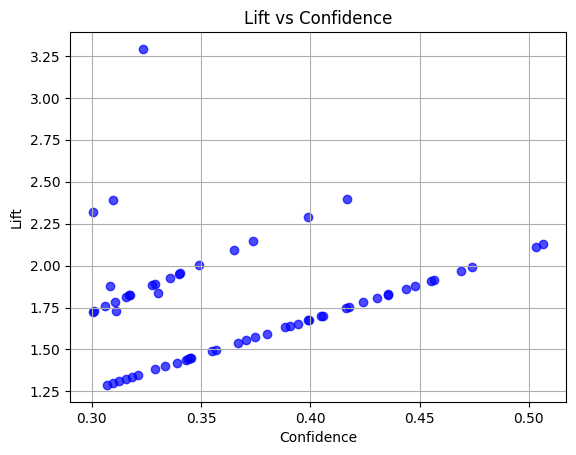

In [114]:
import matplotlib.pyplot as plt

# Plot lift vs confidence
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, c='blue')
plt.title('Lift vs Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid()
plt.show()


# Interview Question :

## 1. What is lift and why is it important in Association rules?

Lift is a key metric in association rule mining that measures the strength of the relationship between two items.

- Higher Lift: Stronger association
- Lower Lift: Weaker or negative association

#### Benefits of High Lift:

- Identifying Strong Patterns: Helps discover meaningful associations.

- Improving Decision-Making: Enables data-driven decisions for product placement, cross-selling, and targeted marketing.

# 2. What is support and Confidence. How do you calculate them?

Support: Measures the frequency of an itemset in a dataset.

Confidence: Measures the strength of an association rule, indicating the probability of an item occurring given another item.

Calculation:

Support(A -> B) = P(A ∩ B): This calculates the probability of both A and B occurring together.

Confidence(A -> B) = P(B|A) = P(A ∩ B) / P(A): This calculates the probability of B occurring given that A has occurred.

# 3. What are some limitations or challenges of Association rules mining?

1. Computational Complexity: As datasets grow, the computational cost of identifying frequent itemsets and rules increases significantly.

2. Rule Proliferation: The technique can generate a large number of rules, many of which may be trivial or redundant.

3. Sensitivity to Thresholds: The choice of minimum support and confidence thresholds can significantly impact the number and quality of rules generated.

4. Lack of Causal Inference: Association rules may not always reveal underlying causal relationships between items.

5. Susceptibility to Noise: Noisy or inconsistent data can lead to inaccurate or misleading rules.

To mitigate these limitations, techniques like pruning, filtering, and advanced algorithms can be employed. However, careful interpretation and domain knowledge are crucial to extract meaningful insights from the generated rules.